# Practical Work

<b> Student: </b> Jonas Fallmann <br>
<b> Matrikulation number </b> 12018700 <br>
<b> Topic:</b> Evaulating gender bias of explained recommender systems<br>
<b> Institute: </b> Institute of Computational Perception, Johannes Kepler University Linz

## Outline
Recent advances in the field of recommender systems focus in a big part on explanations of recommended Items. Explainability has been shown to aid user trust and results in higher conversion rates in the online shopping domain. As an example, explanations in the music domain could be of the following form:

<b>Recommended Item:</b> Clocks and Whoopty by Pintel Ragetti<br>
<b> Explanation: </b>  



# Train Model

### Load config and create Dataset

In [1]:
from logging import getLogger
from recbole.config import Config
from recbole.data import create_dataset, data_preparation
from recbole.model.knowledge_aware_recommender import KGAT
from recbole.trainer import KGATTrainer
from recbole.utils import init_seed, init_logger

train_model = True
create_paths = True

In [2]:

# configurations initialization
config = Config(model='KGAT', dataset='rb_lfm', config_file_list=['lfm.yaml'])

# init random seed
init_seed(config['seed'], config['reproducibility'])

# logger initialization
init_logger(config)
logger = getLogger()

# write config info into log
logger.info(config)

# dataset creating and filtering
dataset = create_dataset(config)
logger.info(dataset)

# dataset splitting
train_data, valid_data, test_data = data_preparation(config, dataset)


06 Mar 23:16    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = ./data/rb_lfm
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 35
train_batch_size = 1024
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [8, 1, 1]}, 'group_by': 'user', 'order': 'TO', 'mode': 'full'}
repeatable = False
metrics = ['NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = NDCG@10
valid_metric_bigger = True
eval_batch_size = 1024
metric_decimal_place = 4

Dataset Hyper Parameters:
field_separator = 	
seq_separator =  
USER_ID_FIELD =

### Train model and evaluate

In [3]:
if train_model:
    # model loading and initialization
    model = KGAT(config, train_data._dataset).to(config['device'])
    logger.info(model)

    # trainer loading and initialization
    trainer = KGATTrainer(config, model)

    print('Starting to fit model')
    # model training
    best_valid_score, best_valid_result = trainer.fit(train_data, valid_data, saved=True, show_progress=True)

    print('Evaluating model')
    # model evaluation
    test_result = trainer.evaluate(test_data, load_best_model=True)
    print(test_result)

/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/dgl/subgraph.py:288: DGLWarning: Key word argument preserve_nodes is deprecated. Use relabel_nodes instead.
  dgl_warning(
/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/recbole/model/knowledge_aware_recommender/kgat.py:159: RuntimeWarning: divide by zero encountered in power
  d_inv = np.power(rowsum, -1).flatten()
/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/recbole/model/knowledge_aware_recommender/kgat.py:166: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525551200/work/torch/csrc/utils/tensor_new.cpp:230.)
  indices = torch.LongTensor([final_adj_matrix.row, final_adj_matrix.col])
06 Mar 23:17    INFO  KGAT(
  (user_embedding): Embedding(9754, 32)
  (entity_embedding): Embedding(275538,

Starting to fit model


Train     0:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     0:   0%|          | 0/2209 [00:00<?, ?it/s]

06 Mar 23:30    INFO  epoch 0 training [time: 755.97s, train_loss1: 1128.1399, train_loss2: 156.2698]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

06 Mar 23:30    INFO  epoch 0 evaluating [time: 18.21s, valid_score: 0.018000]
06 Mar 23:30    INFO  valid result: 
ndcg@10 : 0.018    hit@10 : 0.1219    precision@10 : 0.0163
06 Mar 23:30    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train     1:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     1:   0%|          | 0/2209 [00:00<?, ?it/s]

06 Mar 23:39    INFO  epoch 1 training [time: 562.85s, train_loss1: 1140.7877, train_loss2: 39.5037]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

06 Mar 23:40    INFO  epoch 1 evaluating [time: 18.19s, valid_score: 0.056300]
06 Mar 23:40    INFO  valid result: 
ndcg@10 : 0.0563    hit@10 : 0.2483    precision@10 : 0.0479
06 Mar 23:40    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train     2:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     2:   0%|          | 0/2209 [00:00<?, ?it/s]

06 Mar 23:49    INFO  epoch 2 training [time: 563.21s, train_loss1: 852.7676, train_loss2: 22.9993]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

06 Mar 23:49    INFO  epoch 2 evaluating [time: 18.09s, valid_score: 0.065100]
06 Mar 23:49    INFO  valid result: 
ndcg@10 : 0.0651    hit@10 : 0.2765    precision@10 : 0.0556
06 Mar 23:49    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train     3:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     3:   0%|          | 0/2209 [00:00<?, ?it/s]

06 Mar 23:59    INFO  epoch 3 training [time: 563.27s, train_loss1: 646.6623, train_loss2: 15.2364]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

06 Mar 23:59    INFO  epoch 3 evaluating [time: 18.21s, valid_score: 0.070100]
06 Mar 23:59    INFO  valid result: 
ndcg@10 : 0.0701    hit@10 : 0.2925    precision@10 : 0.0596
06 Mar 23:59    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train     4:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     4:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 00:09    INFO  epoch 4 training [time: 562.87s, train_loss1: 514.8036, train_loss2: 11.1650]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 00:09    INFO  epoch 4 evaluating [time: 18.06s, valid_score: 0.072200]
07 Mar 00:09    INFO  valid result: 
ndcg@10 : 0.0722    hit@10 : 0.2968    precision@10 : 0.062
07 Mar 00:09    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train     5:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     5:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 00:18    INFO  epoch 5 training [time: 563.89s, train_loss1: 428.3520, train_loss2: 8.7343]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 00:19    INFO  epoch 5 evaluating [time: 18.20s, valid_score: 0.074600]
07 Mar 00:19    INFO  valid result: 
ndcg@10 : 0.0746    hit@10 : 0.307    precision@10 : 0.0638
07 Mar 00:19    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train     6:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     6:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 00:28    INFO  epoch 6 training [time: 563.66s, train_loss1: 367.1952, train_loss2: 7.0211]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 00:28    INFO  epoch 6 evaluating [time: 18.22s, valid_score: 0.077300]
07 Mar 00:28    INFO  valid result: 
ndcg@10 : 0.0773    hit@10 : 0.3172    precision@10 : 0.0665
07 Mar 00:28    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train     7:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     7:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 00:38    INFO  epoch 7 training [time: 563.89s, train_loss1: 322.7862, train_loss2: 5.7306]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 00:38    INFO  epoch 7 evaluating [time: 18.32s, valid_score: 0.081000]
07 Mar 00:38    INFO  valid result: 
ndcg@10 : 0.081    hit@10 : 0.326    precision@10 : 0.0693
07 Mar 00:38    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train     8:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     8:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 00:47    INFO  epoch 8 training [time: 563.51s, train_loss1: 287.3548, train_loss2: 4.6977]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 00:48    INFO  epoch 8 evaluating [time: 18.32s, valid_score: 0.082100]
07 Mar 00:48    INFO  valid result: 
ndcg@10 : 0.0821    hit@10 : 0.332    precision@10 : 0.0714
07 Mar 00:48    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train     9:   0%|          | 0/3910 [00:00<?, ?it/s]

Train     9:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 00:57    INFO  epoch 9 training [time: 564.07s, train_loss1: 257.7668, train_loss2: 4.2175]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 00:57    INFO  epoch 9 evaluating [time: 18.20s, valid_score: 0.084800]
07 Mar 00:57    INFO  valid result: 
ndcg@10 : 0.0848    hit@10 : 0.3385    precision@10 : 0.0731
07 Mar 00:57    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    10:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    10:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 01:07    INFO  epoch 10 training [time: 563.87s, train_loss1: 236.1479, train_loss2: 3.6454]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 01:07    INFO  epoch 10 evaluating [time: 18.14s, valid_score: 0.086400]
07 Mar 01:07    INFO  valid result: 
ndcg@10 : 0.0864    hit@10 : 0.3398    precision@10 : 0.0745
07 Mar 01:07    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    11:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    11:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 01:16    INFO  epoch 11 training [time: 563.91s, train_loss1: 216.4724, train_loss2: 3.3360]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 01:17    INFO  epoch 11 evaluating [time: 18.27s, valid_score: 0.087700]
07 Mar 01:17    INFO  valid result: 
ndcg@10 : 0.0877    hit@10 : 0.3446    precision@10 : 0.0755
07 Mar 01:17    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    12:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    12:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 01:26    INFO  epoch 12 training [time: 563.26s, train_loss1: 199.9468, train_loss2: 3.0587]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 01:26    INFO  epoch 12 evaluating [time: 18.23s, valid_score: 0.090400]
07 Mar 01:26    INFO  valid result: 
ndcg@10 : 0.0904    hit@10 : 0.3581    precision@10 : 0.078
07 Mar 01:27    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    13:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    13:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 01:36    INFO  epoch 13 training [time: 564.27s, train_loss1: 185.8880, train_loss2: 2.9238]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 01:36    INFO  epoch 13 evaluating [time: 18.35s, valid_score: 0.093000]
07 Mar 01:36    INFO  valid result: 
ndcg@10 : 0.093    hit@10 : 0.3629    precision@10 : 0.0804
07 Mar 01:36    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    14:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    14:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 01:46    INFO  epoch 14 training [time: 563.37s, train_loss1: 174.7666, train_loss2: 2.7252]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 01:46    INFO  epoch 14 evaluating [time: 18.09s, valid_score: 0.092900]
07 Mar 01:46    INFO  valid result: 
ndcg@10 : 0.0929    hit@10 : 0.364    precision@10 : 0.0805


Train    15:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    15:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 01:55    INFO  epoch 15 training [time: 563.74s, train_loss1: 165.2588, train_loss2: 2.4316]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 01:56    INFO  epoch 15 evaluating [time: 18.13s, valid_score: 0.095000]
07 Mar 01:56    INFO  valid result: 
ndcg@10 : 0.095    hit@10 : 0.3652    precision@10 : 0.0818
07 Mar 01:56    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    16:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    16:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 02:05    INFO  epoch 16 training [time: 563.30s, train_loss1: 155.6905, train_loss2: 2.2447]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 02:05    INFO  epoch 16 evaluating [time: 18.25s, valid_score: 0.096900]
07 Mar 02:05    INFO  valid result: 
ndcg@10 : 0.0969    hit@10 : 0.3725    precision@10 : 0.0833
07 Mar 02:05    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    17:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    17:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 02:15    INFO  epoch 17 training [time: 563.23s, train_loss1: 146.8183, train_loss2: 2.1414]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 02:15    INFO  epoch 17 evaluating [time: 18.41s, valid_score: 0.096600]
07 Mar 02:15    INFO  valid result: 
ndcg@10 : 0.0966    hit@10 : 0.3754    precision@10 : 0.0833


Train    18:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    18:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 02:24    INFO  epoch 18 training [time: 563.74s, train_loss1: 141.0216, train_loss2: 2.1465]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 02:25    INFO  epoch 18 evaluating [time: 18.16s, valid_score: 0.097100]
07 Mar 02:25    INFO  valid result: 
ndcg@10 : 0.0971    hit@10 : 0.3697    precision@10 : 0.0837
07 Mar 02:25    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    19:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    19:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 02:34    INFO  epoch 19 training [time: 563.38s, train_loss1: 135.6060, train_loss2: 1.8387]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 02:34    INFO  epoch 19 evaluating [time: 18.31s, valid_score: 0.098100]
07 Mar 02:34    INFO  valid result: 
ndcg@10 : 0.0981    hit@10 : 0.3706    precision@10 : 0.0841
07 Mar 02:34    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    20:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    20:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 02:44    INFO  epoch 20 training [time: 563.52s, train_loss1: 131.2105, train_loss2: 1.8810]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 02:44    INFO  epoch 20 evaluating [time: 18.15s, valid_score: 0.099200]
07 Mar 02:44    INFO  valid result: 
ndcg@10 : 0.0992    hit@10 : 0.3747    precision@10 : 0.0859
07 Mar 02:44    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    21:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    21:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 02:53    INFO  epoch 21 training [time: 563.29s, train_loss1: 125.9075, train_loss2: 1.9101]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 02:54    INFO  epoch 21 evaluating [time: 18.13s, valid_score: 0.101700]
07 Mar 02:54    INFO  valid result: 
ndcg@10 : 0.1017    hit@10 : 0.3841    precision@10 : 0.0881
07 Mar 02:54    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    22:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    22:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 03:03    INFO  epoch 22 training [time: 563.02s, train_loss1: 121.3910, train_loss2: 1.8070]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 03:03    INFO  epoch 22 evaluating [time: 18.28s, valid_score: 0.101600]
07 Mar 03:03    INFO  valid result: 
ndcg@10 : 0.1016    hit@10 : 0.3856    precision@10 : 0.0877


Train    23:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    23:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 03:13    INFO  epoch 23 training [time: 563.88s, train_loss1: 118.0965, train_loss2: 1.8524]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 03:13    INFO  epoch 23 evaluating [time: 18.02s, valid_score: 0.102700]
07 Mar 03:13    INFO  valid result: 
ndcg@10 : 0.1027    hit@10 : 0.3865    precision@10 : 0.0885
07 Mar 03:13    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    24:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    24:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 03:23    INFO  epoch 24 training [time: 563.08s, train_loss1: 114.8320, train_loss2: 1.6174]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 03:23    INFO  epoch 24 evaluating [time: 18.10s, valid_score: 0.102500]
07 Mar 03:23    INFO  valid result: 
ndcg@10 : 0.1025    hit@10 : 0.3853    precision@10 : 0.0885


Train    25:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    25:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 03:32    INFO  epoch 25 training [time: 563.86s, train_loss1: 112.2772, train_loss2: 1.6526]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 03:33    INFO  epoch 25 evaluating [time: 18.23s, valid_score: 0.103100]
07 Mar 03:33    INFO  valid result: 
ndcg@10 : 0.1031    hit@10 : 0.3873    precision@10 : 0.0888
07 Mar 03:33    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    26:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    26:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 03:42    INFO  epoch 26 training [time: 563.39s, train_loss1: 109.7315, train_loss2: 1.6728]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 03:42    INFO  epoch 26 evaluating [time: 17.98s, valid_score: 0.105300]
07 Mar 03:42    INFO  valid result: 
ndcg@10 : 0.1053    hit@10 : 0.3914    precision@10 : 0.0904
07 Mar 03:42    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    27:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    27:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 03:52    INFO  epoch 27 training [time: 563.61s, train_loss1: 107.0484, train_loss2: 1.6382]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 03:52    INFO  epoch 27 evaluating [time: 17.93s, valid_score: 0.105700]
07 Mar 03:52    INFO  valid result: 
ndcg@10 : 0.1057    hit@10 : 0.3922    precision@10 : 0.0911
07 Mar 03:52    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    28:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    28:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 04:01    INFO  epoch 28 training [time: 564.00s, train_loss1: 104.2589, train_loss2: 1.5502]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 04:02    INFO  epoch 28 evaluating [time: 18.41s, valid_score: 0.105800]
07 Mar 04:02    INFO  valid result: 
ndcg@10 : 0.1058    hit@10 : 0.3947    precision@10 : 0.0909
07 Mar 04:02    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    29:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    29:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 04:11    INFO  epoch 29 training [time: 563.72s, train_loss1: 102.5425, train_loss2: 1.5778]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 04:11    INFO  epoch 29 evaluating [time: 18.33s, valid_score: 0.106200]
07 Mar 04:11    INFO  valid result: 
ndcg@10 : 0.1062    hit@10 : 0.3969    precision@10 : 0.0919
07 Mar 04:11    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    30:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    30:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 04:21    INFO  epoch 30 training [time: 563.57s, train_loss1: 100.6644, train_loss2: 1.4274]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 04:21    INFO  epoch 30 evaluating [time: 18.51s, valid_score: 0.107000]
07 Mar 04:21    INFO  valid result: 
ndcg@10 : 0.107    hit@10 : 0.3962    precision@10 : 0.0919
07 Mar 04:21    INFO  Saving current: saved/KGAT-Mar-06-2023_23-17-41.pth


Train    31:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    31:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 04:30    INFO  epoch 31 training [time: 563.59s, train_loss1: 98.7010, train_loss2: 1.3989]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 04:31    INFO  epoch 31 evaluating [time: 18.31s, valid_score: 0.105300]
07 Mar 04:31    INFO  valid result: 
ndcg@10 : 0.1053    hit@10 : 0.3931    precision@10 : 0.0907


Train    32:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    32:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 04:40    INFO  epoch 32 training [time: 563.99s, train_loss1: 97.2910, train_loss2: 1.5435]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 04:41    INFO  epoch 32 evaluating [time: 17.97s, valid_score: 0.105200]
07 Mar 04:41    INFO  valid result: 
ndcg@10 : 0.1052    hit@10 : 0.3993    precision@10 : 0.0912


Train    33:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    33:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 04:50    INFO  epoch 33 training [time: 563.77s, train_loss1: 95.8674, train_loss2: 1.4484]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 04:50    INFO  epoch 33 evaluating [time: 18.21s, valid_score: 0.105700]
07 Mar 04:50    INFO  valid result: 
ndcg@10 : 0.1057    hit@10 : 0.3985    precision@10 : 0.0916


Train    34:   0%|          | 0/3910 [00:00<?, ?it/s]

Train    34:   0%|          | 0/2209 [00:00<?, ?it/s]

07 Mar 05:00    INFO  epoch 34 training [time: 563.53s, train_loss1: 95.2137, train_loss2: 1.2787]


Evaluate   :   0%|                                                         | 0/9649 [00:00<?, ?it/s…

07 Mar 05:00    INFO  epoch 34 evaluating [time: 18.19s, valid_score: 0.106400]
07 Mar 05:00    INFO  valid result: 
ndcg@10 : 0.1064    hit@10 : 0.3999    precision@10 : 0.0914


Evaluating model


07 Mar 05:00    INFO  Loading model structure and parameters from saved/KGAT-Mar-06-2023_23-17-41.pth


OrderedDict([('ndcg@10', 0.0999), ('hit@10', 0.3803), ('precision@10', 0.0868)])


# Load best model

In [4]:
import os
import torch

In [5]:
latest_model = 'saved/%s' % os.listdir('saved')[-1]

In [6]:
latest_model

'saved/KGAT-Mar-06-2023_08-03-10.pth'

In [7]:
state_dict = torch.load(latest_model, map_location='cuda')
model = KGAT(config, train_data._dataset).to(config['device'])

model.load_state_dict(state_dict['state_dict'])

<All keys matched successfully>

In [8]:
trainer = KGATTrainer(config, model)
test_result = trainer.evaluate(test_data, load_best_model=False)
print(test_result)

OrderedDict([('ndcg@10', 0.1072), ('hit@10', 0.4015), ('precision@10', 0.0924)])


# Prepare for model evaluation

## Create graph from attention matrix

In [9]:
import os
import torch
from scipy.sparse import coo_matrix
from scipy.sparse.csgraph import shortest_path
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from recbole.data.interaction import Interaction


In [10]:
def get_path(Pr, j):
    path = [j]
    k = j
    while Pr[k] != -9999:
        path.append(Pr[k])
        k = Pr[k]
    return path[::-1]

In [11]:
from enum import Enum
class DistanceMode(Enum):
    Inverse=1
    RBF=2
    Linear=3

In [12]:
attention_matrix = model.A_in.cpu().coalesce()
attention_matrix_size = attention_matrix.size()[0] # since it is square

In [13]:
def create_scipy_matrix(distance_mode: str, size: int):
    attention_values = attention_matrix.values().numpy()
    if distance_mode == DistanceMode.Inverse:
        attention_values = 1/attention_values
    if distance_mode == DistanceMode.RBF:
        attention_values = np.exp(-attention_values**2)
    if distance_mode == DistanceMode.Linear:
        attention_values = 1-attention_values
    return coo_matrix((attention_values, (attention_matrix.indices()[0].numpy(), attention_matrix.indices()[1].numpy())), shape=(size,size))

In [14]:
graph_matrix = create_scipy_matrix(DistanceMode.RBF, attention_matrix_size)

## Create shortest path for k top predictions

<b> Important note:</b> Id's in the attention matrix are shiftet by the number of users `dataset.user_num`. So fetching an id using the token i.e. token2id results in an id not yet shifted. So to get the corresponding attention-matrix-id we need to shift items and entities!

In [15]:
user_paths = {}

for batch_idx, batched_data in enumerate(tqdm(test_data)):
    interaction, history_index, positive_u, positive_i = batched_data
    user_id = interaction['user_id'].cpu().numpy().item()
    
    predictions = model.full_sort_predict(interaction).detach().cpu().numpy()
    recommended_items = np.argsort(predictions)
    recommended_items = recommended_items[np.isin(recommended_items, positive_i + dataset.user_num)]
    
    # now calculate shortest distances for current user
    shortest_distances, predecessors = shortest_path(graph_matrix, directed=True,  return_predecessors = True, indices=[user_id])
    
    # calculate the paths for the top k recommended items
    paths = []
    for item_idx in recommended_items:
        path = get_path(predecessors[0], item_idx)
        paths.append(np.asarray(path, dtype=int))
    user_paths[user_id] = paths

  0%|          | 0/9703 [00:00<?, ?it/s]

In [16]:
import pickle
file_name = 'paths.pkl'
if create_paths:
    with open(file_name, 'wb') as file:
        pickle.dump(user_paths, file)
        print(f'Object successfully saved to "{file_name}"')
else:
    with open(file_name, 'rb') as file:
        user_paths = pickle.load(file)
        print(f'Object successfully loaded from "{file_name}"')

Object successfully saved to "paths.pkl"


In [17]:
gender_ids = dataset.token2id('entity_id', ['m', 'f'])

In [18]:
male_attention_row = np.asarray(graph_matrix.getrow(dataset.user_num + gender_ids[0]).todense())
male_attention_row

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
np.nonzero(male_attention_row)

(array([], dtype=int64), array([], dtype=int64))

In [20]:
male_attention_col = np.asarray(graph_matrix.getcol(dataset.user_num + gender_ids[0]).todense())
male_attention_col

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [21]:
np.nonzero(male_attention_col)

(array([166590, 166591, 166592, ..., 176383, 176385, 176386]),
 array([0, 0, 0, ..., 0, 0, 0]))

(array([1.30000e+01, 0.00000e+00, 1.47846e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.81828e+05, 0.00000e+00, 0.00000e+00, 1.43400e+03]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

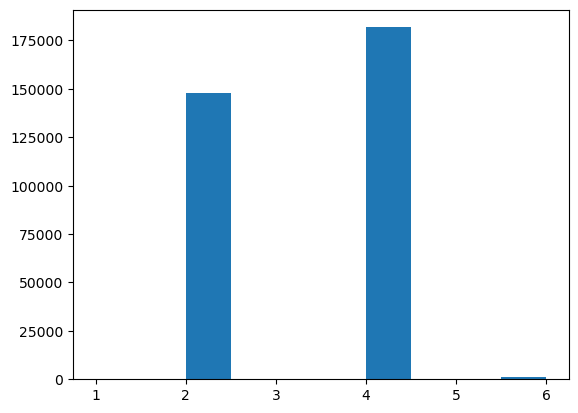

In [56]:
flat_list = [item for sublist in list(user_paths.values()) for item in sublist]
flat_lengths = [len(item) for item in flat_list]
plt.hist(flat_lengths)

# Evaluation

In [22]:
import seaborn as sns

## Load all users and divide into male and female

In [23]:
import pandas as pd
user_df = pd.read_csv('data/lfm/50percent_subset_users.tsv', sep='\t')

In [24]:
user_ids = list(user_paths.keys())

In [25]:
external_user_ids = [int(item) for item in dataset.id2token(dataset.uid_field, user_ids)]

In [26]:
# remove users that recbole removed in the dataset creation process
user_df = user_df[user_df.user_id.isin(external_user_ids)]

In [27]:
male_users = user_df[user_df.gender == 'm']
female_users = user_df[user_df.gender =='f']

<BarContainer object of 2 artists>

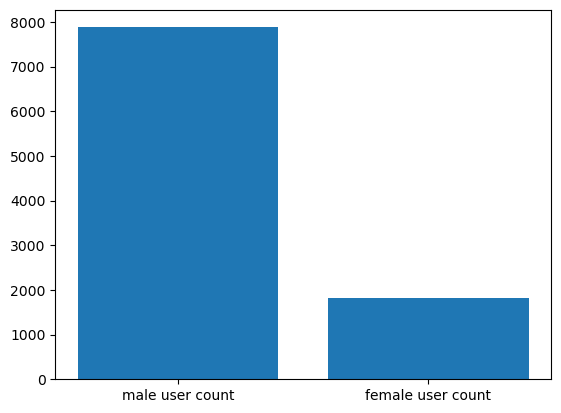

In [28]:
plt.bar(['male user count', 'female user count'], [len(male_users), len(female_users)])

In [29]:
male_internal_user_ids = dataset.token2id(dataset.uid_field, [str(item) for item in male_users.user_id.to_numpy()])
female_internal_user_ids = dataset.token2id(dataset.uid_field, [str(item) for item in female_users.user_id.to_numpy()])

In [30]:
def internal_id_to_gender(idx: int):
    return 'm' if idx in male_internal_user_ids else 'f'

In [31]:
def is_male(idx:int):
    return idx in male_internal_user_ids

### Calculate average path length on per user basis

In [32]:
user_average_path_lengths = {}
for key in user_paths.keys():
    paths_for_user = user_paths[key]
    average_path_length = np.mean([len(path) for path in paths_for_user])
    user_average_path_lengths[key] = average_path_length

/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jfallmann/miniconda3/envs/pr/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [33]:
length_distribution_dataframe = pd.DataFrame({'gender': [internal_id_to_gender(idx) for idx in user_paths.keys()], 'average path length': list(user_average_path_lengths.values()), 'male/female': ['_' for _ in user_paths.keys()]})
length_distribution_dataframe

,gender,average path length,male/female
0,m,3.666667,_
1,m,3.696429,_
2,f,3.625000,_
3,m,3.000000,_
4,f,3.555556,_
...,...,...,...
9698,m,4.000000,_
9699,f,4.000000,_
9700,m,6.000000,_
9701,m,4.000000,_


Text(0, 0.5, 'Occurence in %')

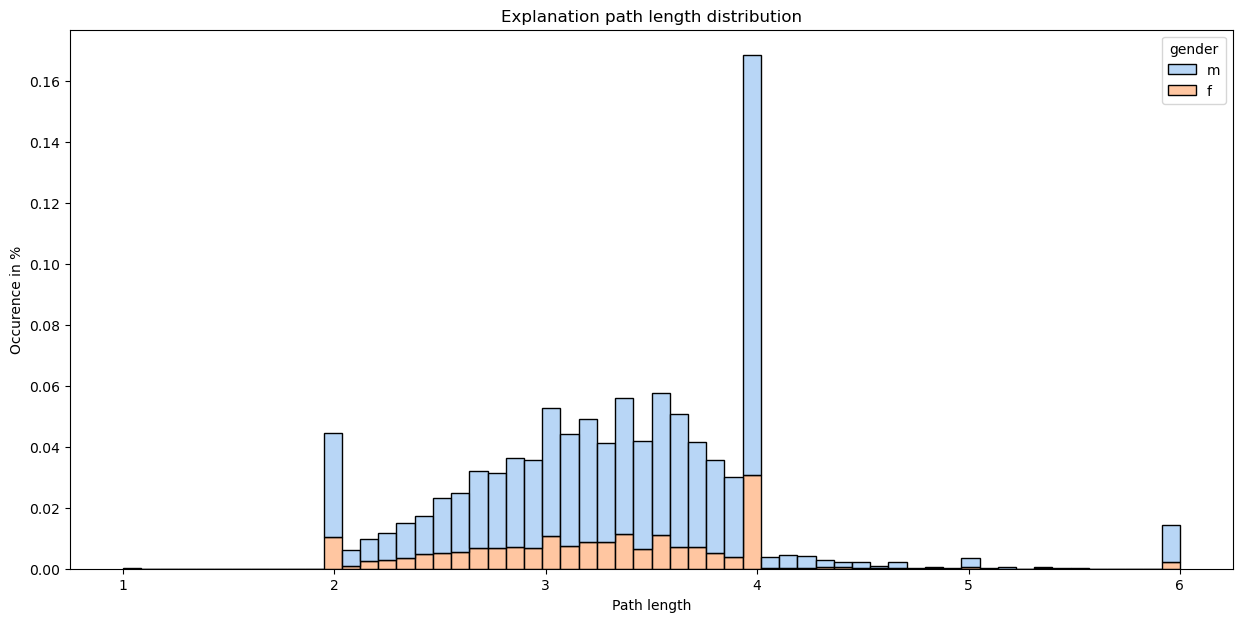

In [34]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,7))
ax = f.add_subplot(1,1,1)

sns.histplot(data=length_distribution_dataframe, ax=ax, stat="proportion", multiple="stack",
             x="average path length", kde=False,
             palette="pastel", hue="gender",
             element="bars", legend=True)
ax.set_title("Explanation path length distribution")
ax.set_xlabel("Path length")
ax.set_ylabel("Occurence in %")

<AxesSubplot: xlabel='male/female', ylabel='average path length'>

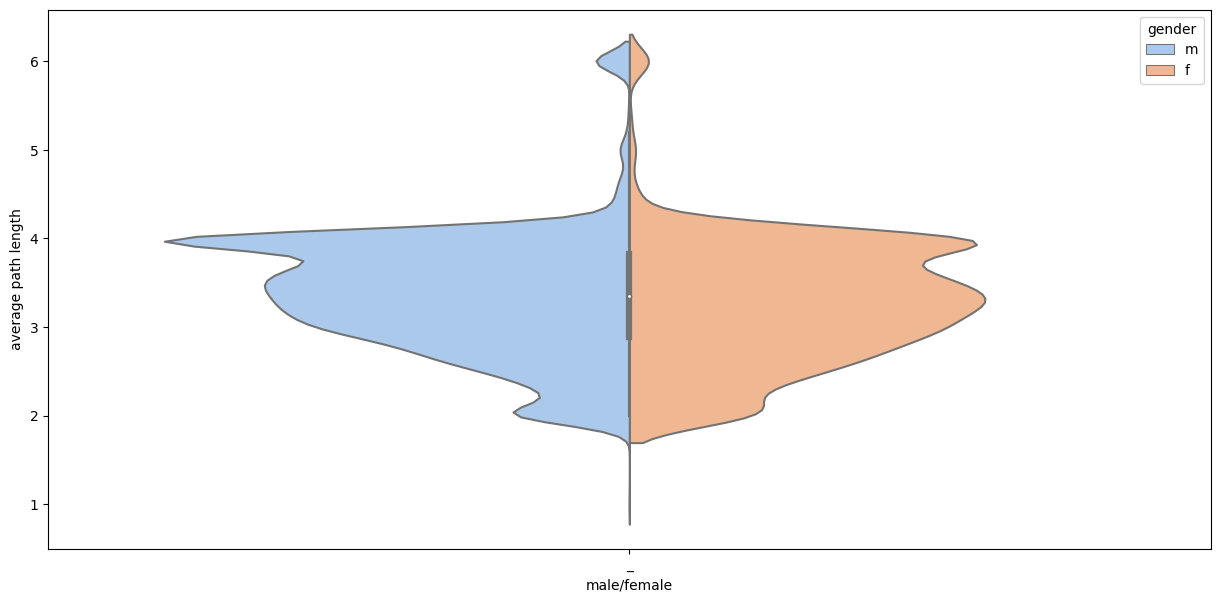

In [35]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,7))
sns.violinplot(data=length_distribution_dataframe, y='average path length', x='male/female', hue='gender', split=True, palette="pastel", stat='proportion', legend=True)

<AxesSubplot: xlabel='male/female', ylabel='average path length'>

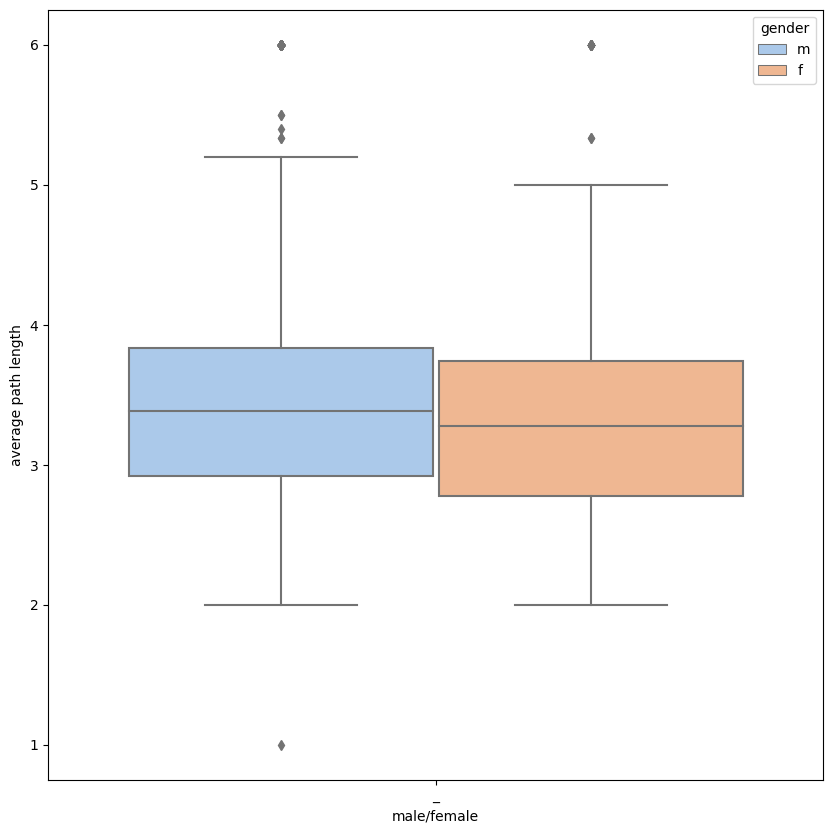

In [36]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,10))
sns.boxplot(y="average path length", x="male/female",
            hue="gender", palette="pastel",
            data=length_distribution_dataframe)

## Evaluate path length per gender per user

In [37]:
import math

In [38]:
male_path_lengths = {}
for key in user_paths.keys():
    if key in male_internal_user_ids:
        if not math.isnan(user_average_path_lengths[key]):
            male_path_lengths[key] = user_average_path_lengths[key]

female_path_lengths = {}
for key in user_paths.keys():
    if key in female_internal_user_ids:
        if not math.isnan(user_average_path_lengths[key]):
            female_path_lengths[key] = user_average_path_lengths[key]

In [39]:
np.mean(list(male_path_lengths.values()))

3.352992493807623

In [40]:
np.median(list(male_path_lengths.values()))

3.38255033557047

In [41]:
np.mean(list(female_path_lengths.values()))

3.2490573992831133

In [42]:
np.median(list(female_path_lengths.values()))

3.276595744680851

## Evaluate path length per gender

In [43]:
male_paths = {}
for key in user_paths.keys():
    if key in male_internal_user_ids:
        male_paths[key] = user_paths[key]

female_paths = {}
for key in user_paths.keys():
    if key in female_internal_user_ids:
        female_paths[key] = user_paths[key]

In [44]:
def average_path_length(paths: dict):
    flat_list = [item for sublist in list(paths.values()) for item in sublist]
    lengths = [len(item) for item in flat_list]
    return np.mean(lengths), lengths

In [45]:
male_average, male_lengths = average_path_length(male_paths)

In [46]:
female_average, female_lengths = average_path_length(female_paths)

In [47]:
female_average, male_average

(3.0725792871175974, 3.123809763897492)

## Evaluate shared entities

In [48]:
male_shared_entities = []
female_shared_entities = []
for user_id in user_paths.keys():
    paths_for_user = user_paths[user_id]
    paths_without_start_and_end = [path[1:] for path in paths_for_user]
    paths_without_start_and_end = list(filter(lambda x: len(x) > 0, paths_without_start_and_end))

    try:
        concatenated_paths = np.concatenate(paths_without_start_and_end)
    except:
        pass
    
    if is_male(user_id):
        male_shared_entities.append(concatenated_paths)
    else:
        female_shared_entities.append(concatenated_paths)
    
male_shared_entities = np.concatenate(male_shared_entities)
female_shared_entities = np.concatenate(female_shared_entities)

In [49]:
male_shared_item_ids, male_shared_item_counts = np.unique(male_shared_entities, return_counts=True)
female_shared_item_ids, female_shared_item_counts = np.unique(female_shared_entities, return_counts=True)

In [50]:
male_shared_item_ids = np.flip(male_shared_item_ids[np.argsort(male_shared_item_counts)])
male_shared_item_counts = np.flip(male_shared_item_counts[np.argsort(male_shared_item_counts)])
female_shared_item_ids = np.flip(female_shared_item_ids[np.argsort(female_shared_item_counts)])
female_shared_item_counts = np.flip(female_shared_item_counts[np.argsort(female_shared_item_counts)])

In [57]:
male_shared_entity_count = np.sum(male_shared_item_counts)
female_shared_entity_count = np.sum(female_shared_item_counts)

In [58]:
for entity_idx, shared_entity in enumerate(male_shared_item_ids[:10]):
    print('Entity %s. \t %s \t %s%%' % (shared_entity, male_shared_item_counts[entity_idx], male_shared_item_counts[entity_idx]*100/male_shared_entity_count))

Entity 6687. 	 1073 	 0.18127878413126408%
Entity 119. 	 944 	 0.15948478305676914%
Entity 519. 	 877 	 0.14816541815761286%
Entity 5700. 	 871 	 0.1471517436890317%
Entity 1171. 	 836 	 0.14123864262230826%
Entity 3236. 	 715 	 0.12079620750592154%
Entity 4190. 	 710 	 0.11995147878210391%
Entity 868. 	 645 	 0.10897000537247468%
Entity 3316. 	 617 	 0.10423952451909593%
Entity 206. 	 613 	 0.10356374154004183%


In [60]:
for entity_idx, shared_entity in enumerate(female_shared_item_ids[:10]):
    print('Entity %s. \t %s \t %s%%' % (shared_entity, female_shared_item_counts[entity_idx], female_shared_item_counts[entity_idx]*100/female_shared_entity_count))

Entity 119. 	 269 	 0.2412404602401643%
Entity 9868. 	 221 	 0.19819383536459595%
Entity 1171. 	 196 	 0.1757737182419041%
Entity 4190. 	 178 	 0.15963123391356596%
Entity 715. 	 151 	 0.13541750742105876%
Entity 1333. 	 148 	 0.13272709336633576%
Entity 519. 	 143 	 0.12824306994179738%
Entity 5700. 	 139 	 0.12465585120216668%
Entity 66. 	 130 	 0.11658460903799761%
Entity 382. 	 121 	 0.10851336687382855%


In [65]:
male_shared_users = male_shared_item_ids[male_shared_item_ids < dataset.user_num]
female_shared_users = female_shared_item_ids[female_shared_item_ids < dataset.user_num]

In [67]:
male_shared_user_gender = [internal_id_to_gender(idx) for idx in male_shared_users]
female_shared_user_gender = [internal_id_to_gender(idx) for idx in female_shared_users]

In [75]:
def evaluate_gender_of_shared_entities(data):
    gender_token, counts = np.unique(data, return_counts=True)
    return {gender_token[0]: counts[0]/np.sum(counts), gender_token[1]: counts[1]/np.sum(counts)}

In [76]:
evaluate_gender_of_shared_entities(male_shared_user_gender)

{'f': 0.1774915254237288, 'm': 0.8225084745762712}

In [77]:
evaluate_gender_of_shared_entities(female_shared_user_gender)

{'f': 0.20268569030633654, 'm': 0.7973143096936635}

In [78]:
evaluate_gender_of_shared_entities(male_shared_user_gender[:100])

{'f': 0.05, 'm': 0.95}

In [79]:
evaluate_gender_of_shared_entities(female_shared_user_gender[:100])

{'f': 0.19, 'm': 0.81}